In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
all_data = pd.read_excel('FINAL_OUTPUT.xlsx')

In [4]:
collision_rate = all_data.groupby(['Parameter', 'Value']).size().reset_index(name='Collision_Count')

heatmap_data = collision_rate.pivot_table(index='Parameter', columns='Value', values='Collision_Count')

collision_counts = all_data.groupby(['Parameter', 'Value']).size().reset_index(name='Collision_Count')
total_vehicles = 133  # assuming for now; you can change to your actual total
collision_counts['Collision_Rate'] = (collision_counts['Collision_Count'] / total_vehicles) * 100

In [5]:
# Average Speed Before Collision
all_data['Average_Speed'] = (all_data['ColliderSpeed'].astype(float) + all_data['VictimSpeed'].astype(float)) / 2
avg_speeds = all_data.groupby(['Parameter', 'Value'])['Average_Speed'].mean().reset_index()

In [6]:
# Unique Vehicles Involved in Collisions
all_data['Involved_Vehicles'] = all_data['Collider'] + ',' + all_data['Victim']
unique_vehicles = all_data.groupby(['Parameter', 'Value'])['Involved_Vehicles'].nunique().reset_index()

In [7]:
# Collisions by Time
collisions_by_time = all_data.groupby(['Parameter', 'Value', 'Time']).size().reset_index(name='Collision_Count')

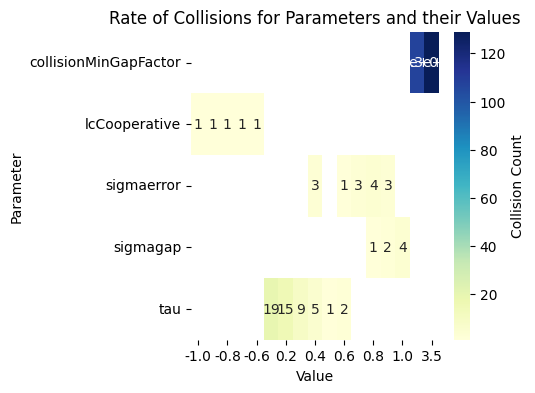

In [10]:
plt.figure(figsize=(4, 4))  # Adjust size as needed

plt.subplot(1, 1, 1)
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Collision Count'})
plt.title('Rate of Collisions for Parameters and their Values')
plt.show()

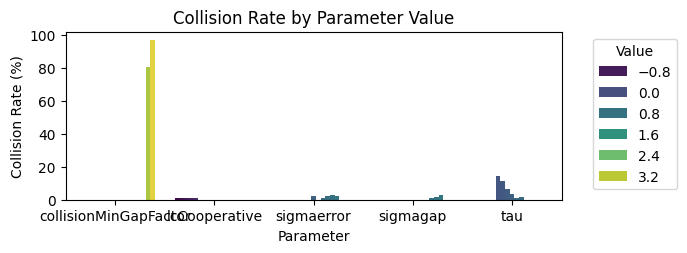

In [11]:
# Collision Rate Bar Plot
plt.subplot(2, 1, 1)
sns.barplot(data=collision_counts, x='Parameter', y='Collision_Rate', hue='Value', palette='viridis')
plt.title('Collision Rate by Parameter Value')
plt.ylabel('Collision Rate (%)')
plt.legend(title='Value', bbox_to_anchor=(1.05, 1), loc='upper left')

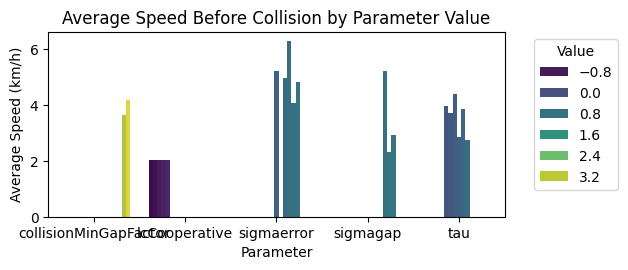

In [12]:
# Average Speed Before Collision Bar Plot
plt.subplot(2, 1, 2)
sns.barplot(data=avg_speeds, x='Parameter', y='Average_Speed', hue='Value', palette='viridis')
plt.title('Average Speed Before Collision by Parameter Value')
plt.ylabel('Average Speed (km/h)')
plt.legend(title='Value', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Index(['E28_0', 'E27_0', '-E29_0', 'E27_1', 'E26_0'], dtype='object', name='Lane')


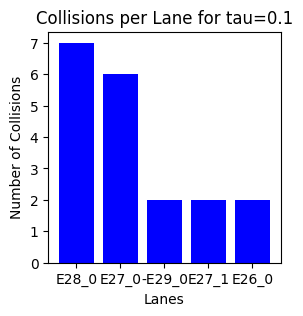

Index(['E28_0', 'E27_0', 'E26_0', 'E27_1', '-E29_0'], dtype='object', name='Lane')


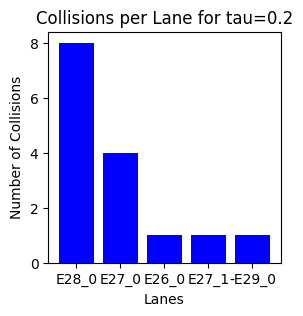

Index(['E28_0', 'E27_0', '-E29_0', 'E26_0'], dtype='object', name='Lane')


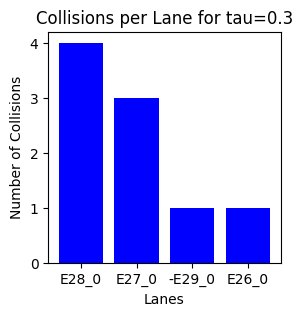

Index(['E28_0', 'E27_0', 'E27_1'], dtype='object', name='Lane')


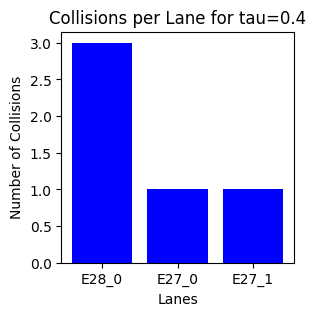

Index(['E28_0'], dtype='object', name='Lane')


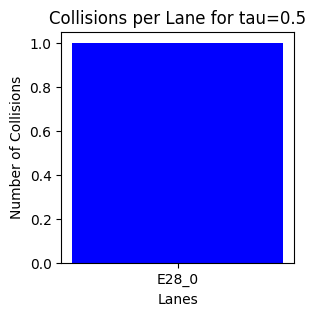

Index(['E28_0'], dtype='object', name='Lane')


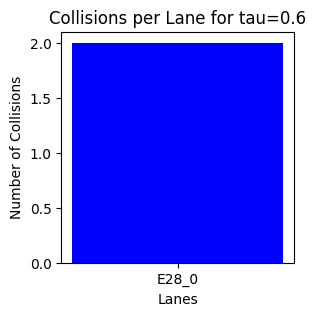

Index(['E28_1', '-E29_1'], dtype='object', name='Lane')


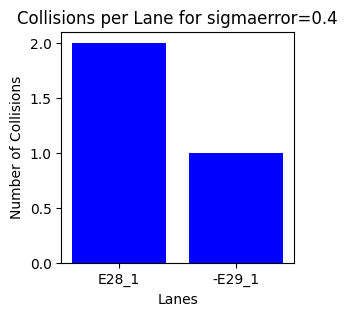

Index(['-E32_0'], dtype='object', name='Lane')


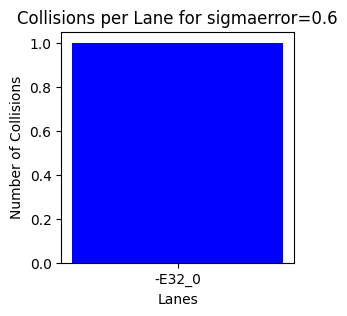

Index([':J5_0_1', 'E28_1', ':J3_2_0'], dtype='object', name='Lane')


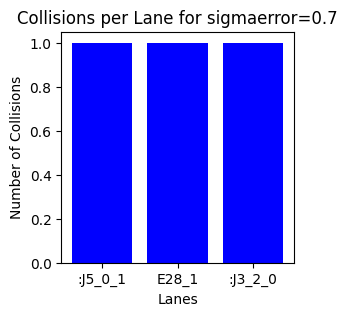

Index(['-E29_1', 'E28_0', 'E28_1', 'E31_0'], dtype='object', name='Lane')


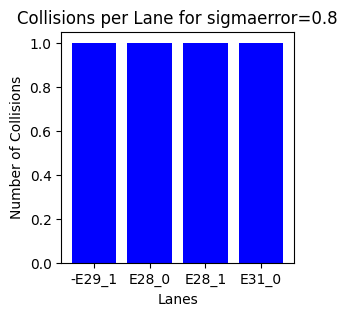

Index(['-E32_1', 'E26_0'], dtype='object', name='Lane')


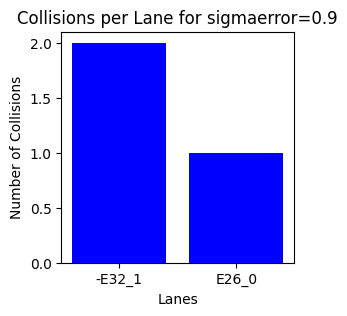

Index(['E28_0'], dtype='object', name='Lane')


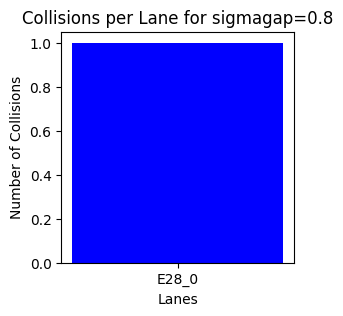

Index(['E27_0', 'E28_0'], dtype='object', name='Lane')


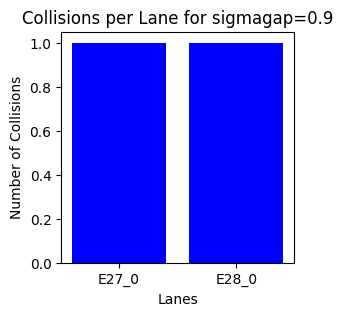

Index(['E27_0', 'E28_0'], dtype='object', name='Lane')


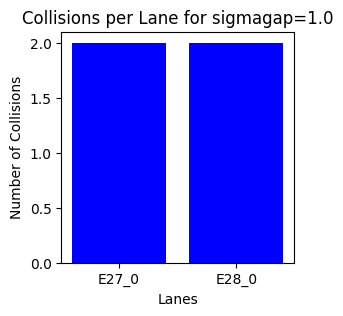

Index(['E27_0'], dtype='object', name='Lane')


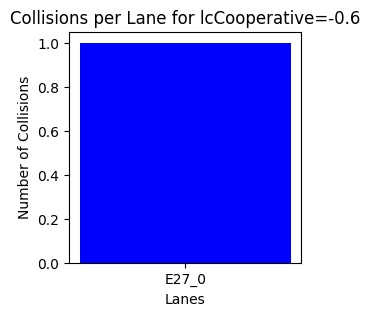

Index(['E27_0'], dtype='object', name='Lane')


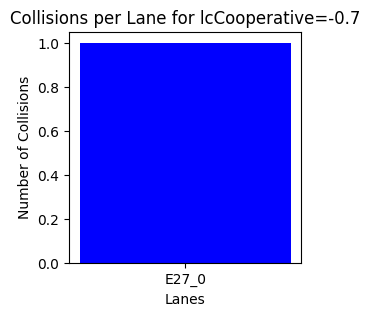

Index(['E27_0'], dtype='object', name='Lane')


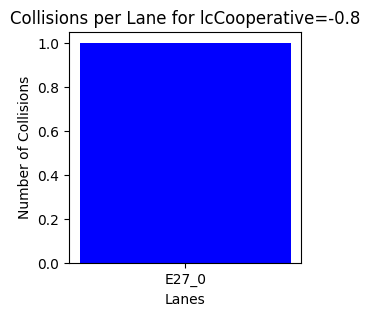

Index(['E27_0'], dtype='object', name='Lane')


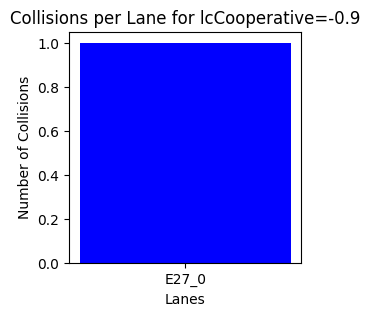

Index(['E27_0'], dtype='object', name='Lane')


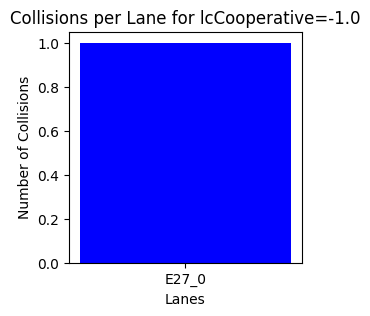

Index(['E28_0', '-E29_0', 'E27_1', '-E32_0', 'E27_0', 'E26_0', ':J5_0_0'], dtype='object', name='Lane')


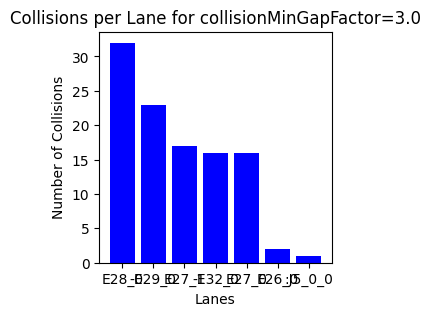

Index(['E28_0', '-E29_0', 'E27_1', '-E32_0', 'E26_0', 'E27_0'], dtype='object', name='Lane')


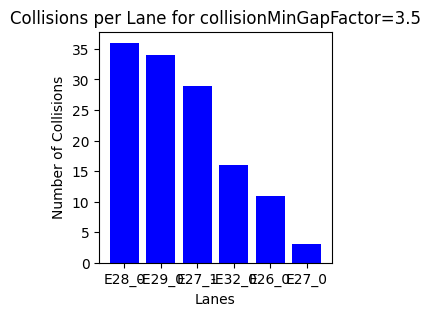

In [14]:
for param_name in all_data['Parameter'].unique():
    for param_value in all_data[all_data['Parameter'] == param_name]['Value'].unique():
        
        # Filter the DataFrame for a specific parameter and its value
        df_filtered = all_data[(all_data['Parameter'] == param_name) & (all_data['Value'] == param_value)]
        
        # Data Aggregation
        lane_collision_counts = df_filtered['Lane'].value_counts()

        # Visualization
        
        # Bar Chart for Collision Counts per Lane
        lanes = lane_collision_counts.index
        print(lanes)
        counts = lane_collision_counts.values

        plt.figure(figsize=(3, 3))
        plt.bar(lanes, counts, color='blue')
        plt.xlabel('Lanes')
        plt.ylabel('Number of Collisions')
        plt.title(f'Collisions per Lane for {param_name}={param_value}')
        plt.show()

In [15]:
collision_counts_1 = all_data.groupby(['Time', 'Lane']).size().reset_index(name='Count')

# Pivot the data so we can plot it
collision_pivot = collision_counts_1.pivot(index='Time', columns='Lane', values='Count').fillna(0)

plt.figure(figsize=(12, 7))

<Figure size 1200x700 with 0 Axes>

<Figure size 1200x700 with 0 Axes>

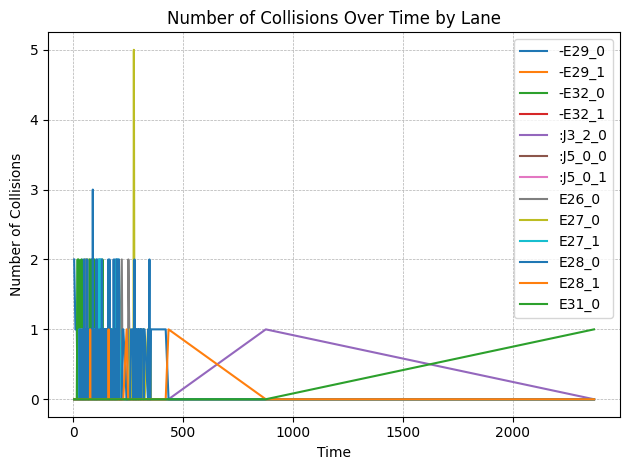

In [16]:
# Plot each lane's data
for lane in collision_pivot.columns:
    plt.plot(collision_pivot.index, collision_pivot[lane], label=lane)

plt.title('Number of Collisions Over Time by Lane')
plt.xlabel('Time')
plt.ylabel('Number of Collisions')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [17]:
all_data['Pos'] = all_data['Pos'].astype(float)

# Create bins for positions. Here I'm using bins of size 50, but you can adjust this
bins = [i for i in range(0, int(all_data['Pos'].max() + 50), 50)]
labels = [str(i) + '-' + str(i+50) for i in bins[:-1]]
all_data['Position_bin'] = pd.cut(all_data['Pos'], bins=bins, labels=labels, right=False)

# Pivot table to get the matrix format required for heatmap
collision_matrix = all_data.groupby(['Lane', 'Position_bin']).size().unstack(fill_value=0)

/var/folders/0n/zwmcmxtn2cvg23pqmq5w29jh0000gn/T/ipykernel_2317/969431360.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  collision_matrix = all_data.groupby(['Lane', 'Position_bin']).size().unstack(fill_value=0)


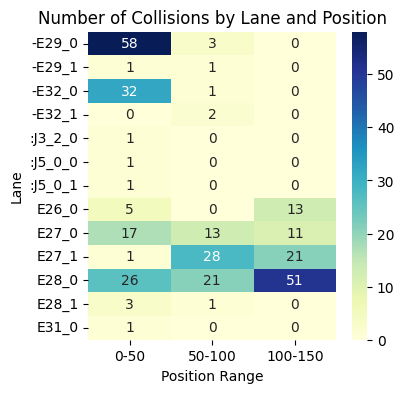

In [19]:
# Plot heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(collision_matrix, annot=True, cmap='YlGnBu')
plt.title('Number of Collisions by Lane and Position')
plt.xlabel('Position Range')
plt.ylabel('Lane')
plt.show()

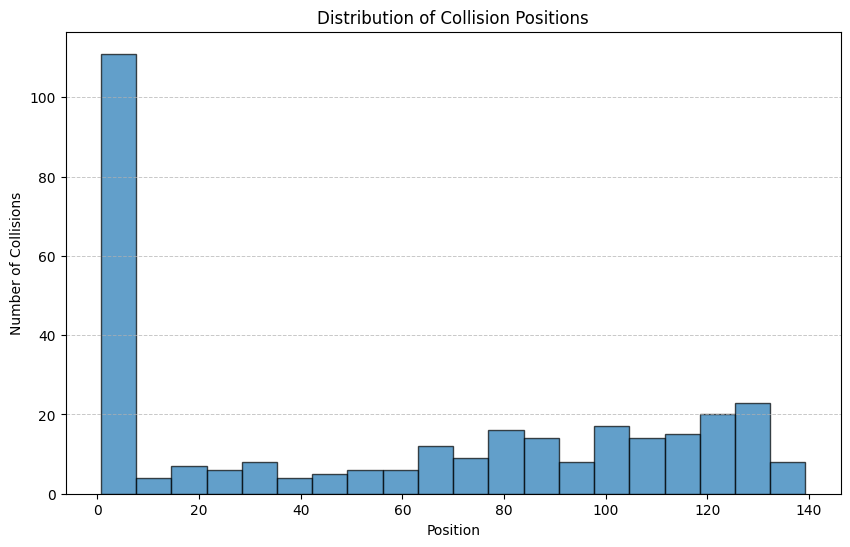

In [20]:
# Convert the 'Pos' column to float for numeric operations
all_data['Pos'] = all_data['Pos'].astype(float)

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(all_data['Pos'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Collision Positions')
plt.xlabel('Position')
plt.ylabel('Number of Collisions')
plt.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.show()

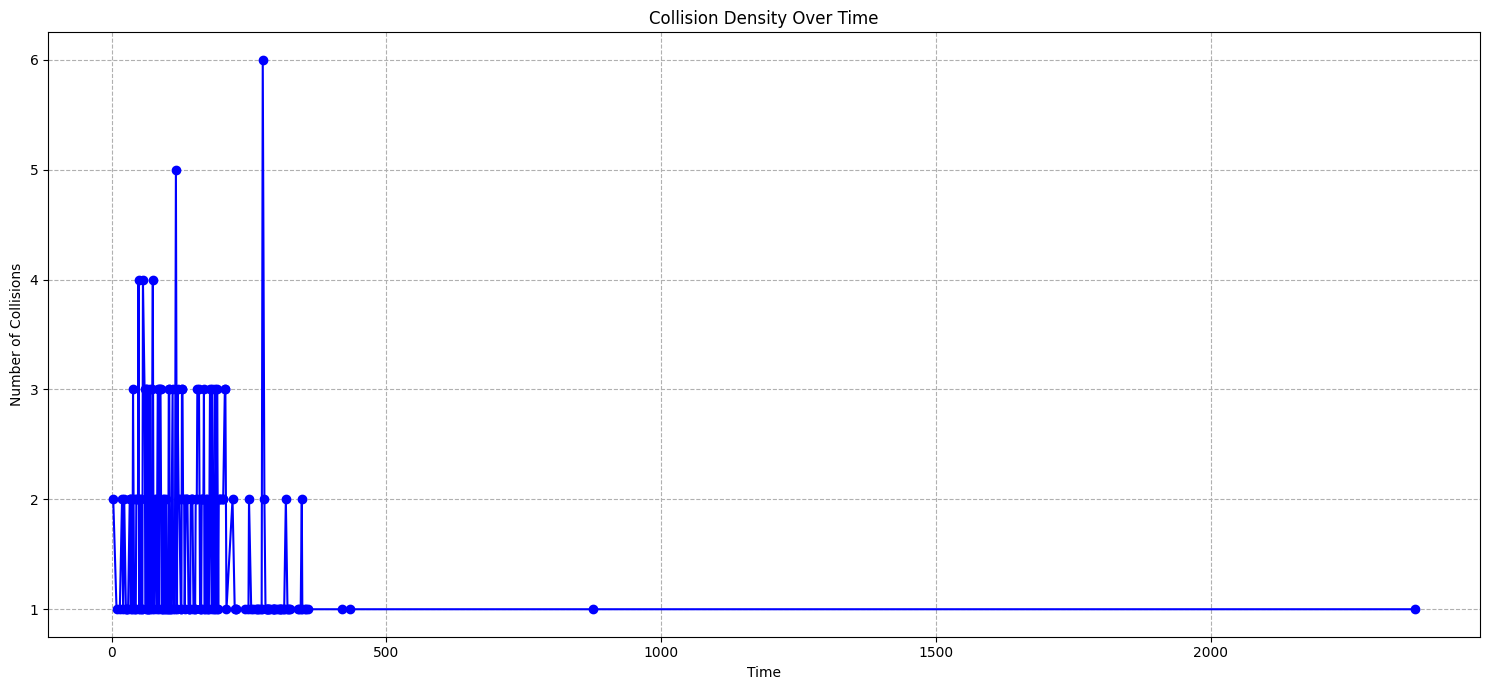

In [21]:
all_data['Time'] = all_data['Time'].astype(float)
time_collision_counts = all_data.groupby('Time').size().reset_index(name='Collision_Count')
plt.figure(figsize=(15, 7))

# Plotting the data
plt.plot(time_collision_counts['Time'], time_collision_counts['Collision_Count'], marker='o', linestyle='-', color='b')

plt.title('Collision Density Over Time')
plt.ylabel('Number of Collisions')
plt.xlabel('Time')
plt.grid(True, which="both", ls="--")

plt.tight_layout()
plt.show()

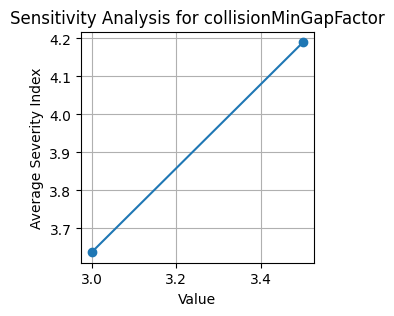

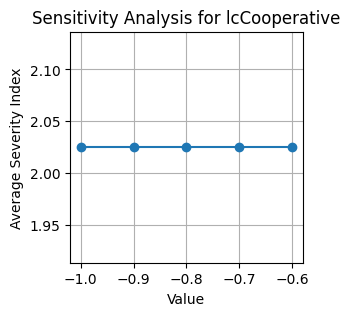

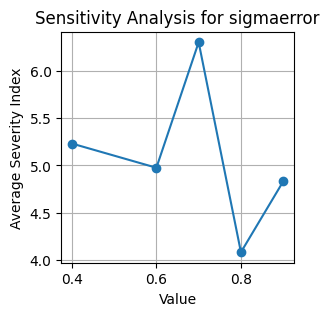

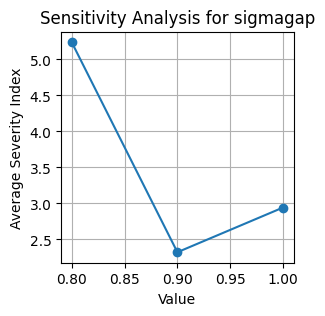

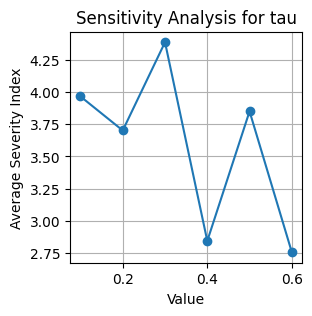

In [23]:
# Grouping by Parameter and Value to get average Severity_Index for each combination
avg_severity = all_data.groupby(['Parameter', 'Value'])['Severity_Index'].mean().reset_index()

# Plotting the sensitivity analysis for each parameter
parameters = avg_severity['Parameter'].unique()

for param in parameters:
    subset = avg_severity[avg_severity['Parameter'] == param]
    
    plt.figure(figsize=(3, 3))
    plt.plot(subset['Value'], subset['Severity_Index'], marker='o', linestyle='-')
    plt.title(f'Sensitivity Analysis for {param}')
    plt.xlabel('Value')
    plt.ylabel('Average Severity Index')
    plt.grid(True)
    plt.show()

